In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit

# 7: Plotting Test Data & Real Data

## Test Data

In [2]:
test_df = pd.read_csv('bighorn_test_data')
test_f = test_df['Frequency']
test_s = test_df['Sample']

<IPython.core.display.Javascript object>


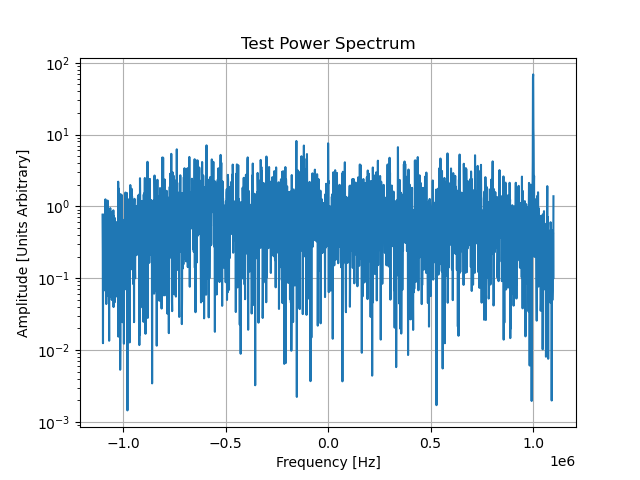

In [3]:
plt.figure()
plt.grid()
plt.title('Test Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(test_f, test_s)
plt.show()

## Real Data

In [6]:
real_df = pd.read_csv('bighorn_real_data')
real_f = real_df['Frequency']
real_s = real_df['Sample']

<IPython.core.display.Javascript object>


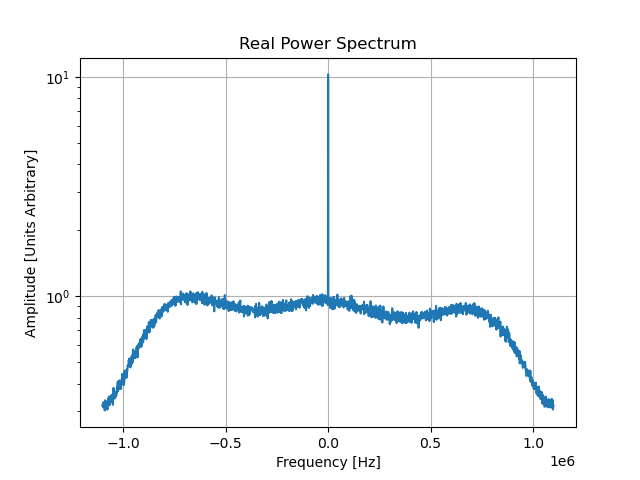

In [7]:
plt.figure()
plt.grid()
plt.title('Real Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(real_f, real_s)
plt.show()

## Real Good Data

In [2]:
rgd = pd.read_csv('real_good_data')
rgf = rgd['f']
rga = rgd['a']

In [3]:
cd = pd.read_csv('cole_data')
cf = cd['f']
ca = cd['a']

In [4]:
new_data = ca - rga

<IPython.core.display.Javascript object>


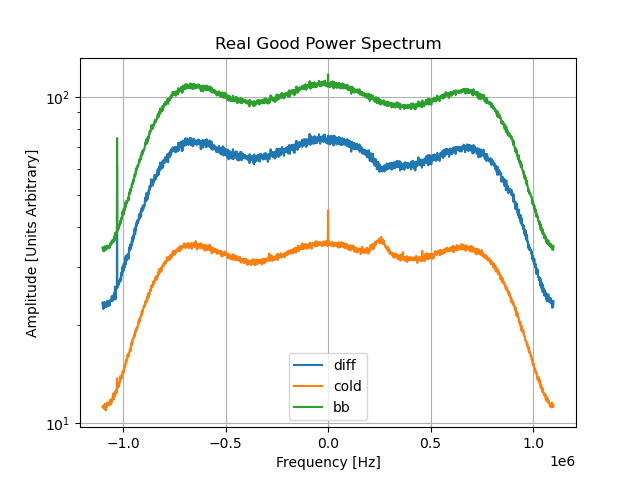

In [5]:
plt.figure()
plt.grid()
plt.title('Real Good Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, new_data, label='diff')
plt.semilogy(rgf, rga, label='cold')
plt.semilogy(cf, ca, label='bb')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


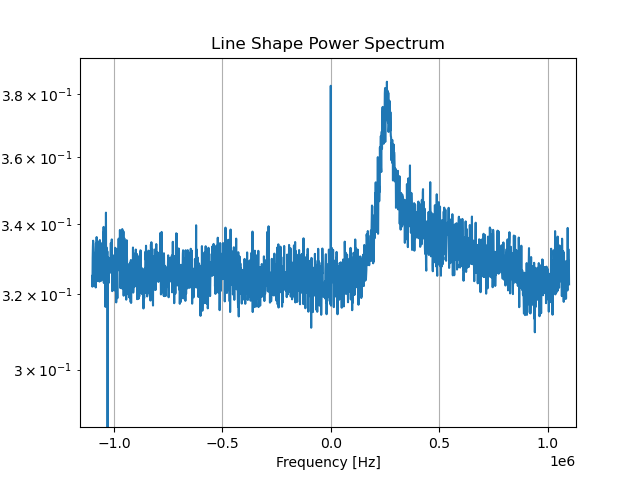

In [7]:
shape = rga/ca

plt.figure()
plt.grid()
plt.title('Line Shape Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, shape)
plt.show()

In [8]:
sum_rga = sum(rga)
G = 300/np.sum(new_data)*np.sum(rga)
G

147.56669625240806

<IPython.core.display.Javascript object>


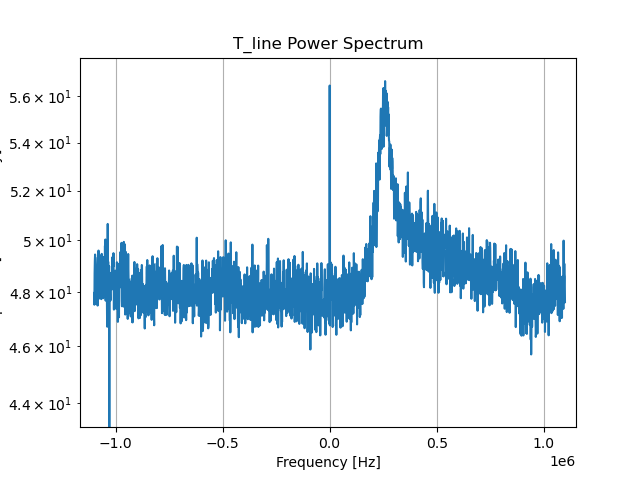

In [9]:
t_line = G*shape

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, t_line)

plt.show()

In [16]:
np.where(t_line==np.max(t_line))

(array([1265], dtype=int32),)

<IPython.core.display.Javascript object>


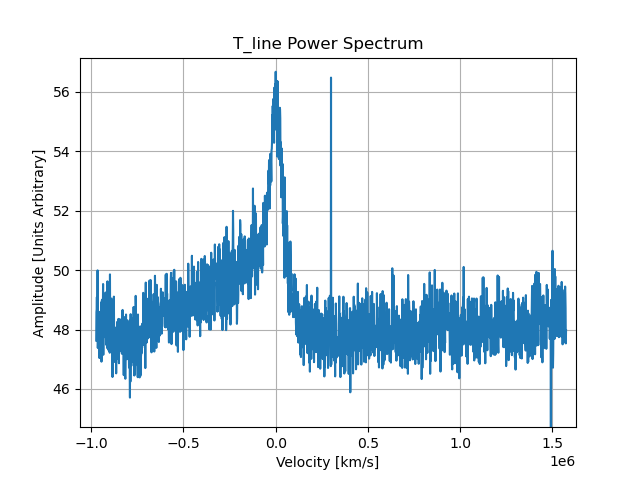

In [25]:
nu_0 = rgf[1265]
delta_nu = rgf - nu_0
v = -delta_nu/nu_0*(3e5)

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Velocity [km/s]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(v, t_line)
plt.show()